## Test SGD

In [2]:
"""
SGD
"""

import sys
sys.path.insert(0, '../src')


from loss.MSELoss import MSELoss
from activation.Sigmoide import Sigmoide
from activation.TanH import TanH
from Linear import Linear
import numpy as np
from mltools import plot_data, plot_frontiere, gen_arti
import matplotlib.pyplot as plt
from Sequentiel import Sequentiel

from Optim import Optim,SGD

In [3]:
# generations de points 
np.random.seed(1)

X, y = gen_arti(data_type=2, epsilon=0.001)

if y.ndim == 1 : 
    y = y.reshape((-1,1))
y = np.where(y > 0 , 1  , 0)

nbIter = 5000

learning_rate = 0.01

nombre_neurone = 256
nombre_neurone2 = 128
nn = Sequentiel(Linear(X.shape[1],nombre_neurone),TanH(),Linear(nombre_neurone,nombre_neurone2),TanH(), Linear(nombre_neurone2,64), TanH(), Linear(64 , y.shape[1]) , Sigmoide())
loss = MSELoss()

optim = SGD(nn , loss , X , y , eps =learning_rate,batch_size=10,nbIter=nbIter)
list_loss = optim.update()

acc = np.where(y == optim.net.predict(X),1,0).mean()

100%|██████████| 5000/5000 [10:51<00:00,  7.67it/s]


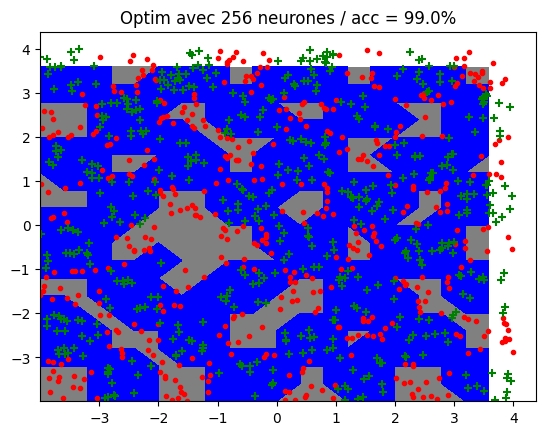

0.99
Taux de bonne classification :  99.0 %


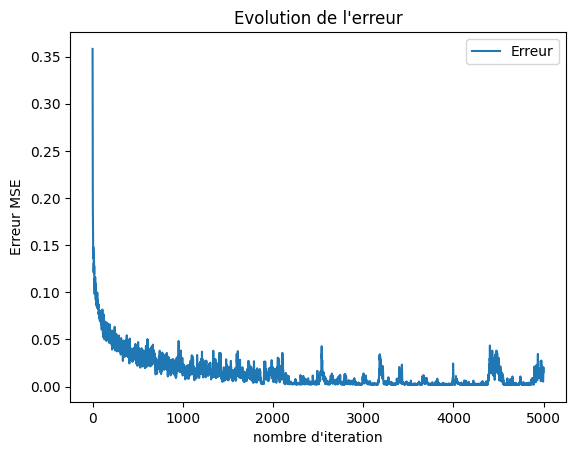

In [4]:
# affichage de la frontiere de decision ainsi que des donnees
plt.figure()
plot_frontiere(X,nn.predict )
plot_data(X,y)
plt.title(f"Optim avec {nombre_neurone} neurones / acc = {(acc*100)}%")
plt.show()

print((np.where(optim.net.predict(X)>=0.5,1,0) == y ).mean())
    
print("Taux de bonne classification : ",((optim.net.predict(X) == np.where(y>=0.5,1,0)).sum()/len(np.where(y>=0.5,1,0)))*100,"%")
# affichage erreur 
plt.figure()
plt.xlabel("nombre d'iteration")
plt.ylabel("Erreur MSE")
plt.title("Evolution de l'erreur")
plt.plot(list_loss,label="Erreur")
plt.legend()
plt.show()